<a href="https://colab.research.google.com/github/adrian-ai-salud/adrian-ai-salud/blob/main/Actividad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install lifelines
!pip install --upgrade lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=5f75d3a1f29a9cf151543ccca227a43baf731afc8bf44b829ba2114de18e6f08
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


#TAREA 1

## SUBIR EL ARCHIVO

En base a este código, realizar las mejoras usando Géminis

In [4]:
import io  # For working with file uploads in Google Colab or Jupyter Notebook
from google.colab import files  # For working with file uploads in Google Colab
import pandas as pd
# 1. Ask user to upload the CSV file
uploaded = files.upload()  # This will prompt the user to upload a file
file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file
# 2. Read the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(io.BytesIO(uploaded[file_name]))
except pd.errors.ParserError:
    print("Error: The uploaded file is not a valid CSV file.")

Saving lung.csv to lung (1).csv


Primeras filas del dataset:
   Unnamed: 0  inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  \
0           1   3.0   306       2   74    1      1.0      90.0      100.0   
1           2   3.0   455       2   68    1      0.0      90.0       90.0   
2           3   3.0  1010       1   56    1      0.0      90.0       90.0   
3           4   5.0   210       2   57    1      1.0      90.0       60.0   
4           5   1.0   883       2   60    1      0.0     100.0       90.0   

   meal.cal  wt.loss  
0    1175.0      NaN  
1    1225.0     15.0  
2       NaN     15.0  
3    1150.0     11.0  
4       NaN      0.0  

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  228 non-null    int64  
 1   inst        227 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-nu

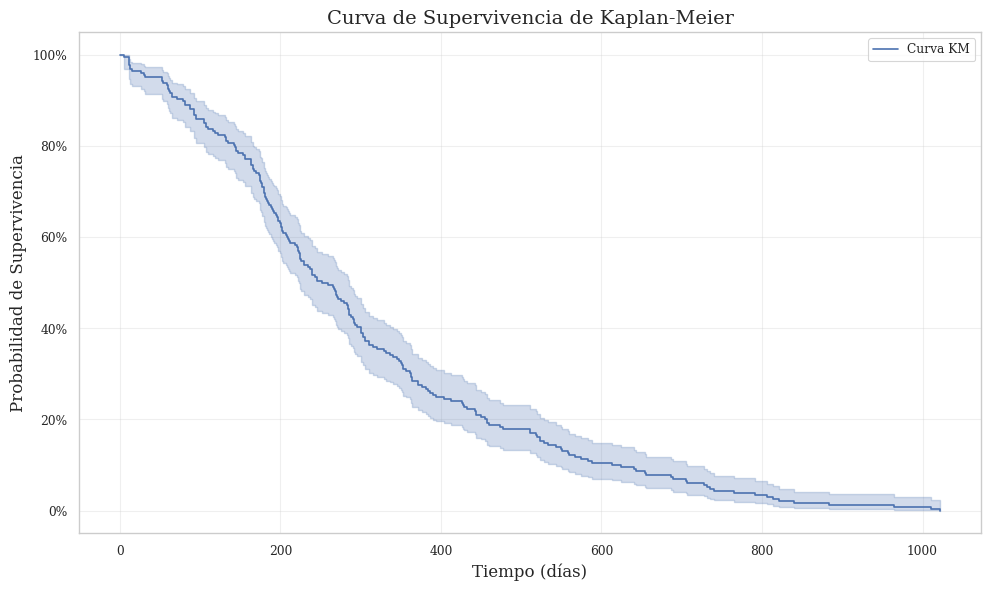


Tiempo mediano de supervivencia: 252.00 días

Probabilidades de supervivencia en momentos específicos:
                                      90 días        180 días        270 días  \
Probabilidad de supervivencia  0.8816 (88.2%)  0.6974 (69.7%)  0.4693 (46.9%)   

                                     365 días        545 días       730 días  
Probabilidad de supervivencia  0.2851 (28.5%)  0.1404 (14.0%)  0.0570 (5.7%)  

Número de pacientes en riesgo en momentos específicos:
                     90 días  180 días  270 días  365 días  545 días  730 días
Pacientes en riesgo      201       159       107        65        32        13

Distribución de eventos:
Fallecidos: 63 (27.6%)
Censurados: 0 (0.0%)


In [5]:
# Ejercicio 1: Análisis Exploratorio y Curva de Supervivencia General
# ==================================================================

# Importar las bibliotecas necesarias

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
import matplotlib.ticker as mtick

# Configurar el estilo de las gráficas para un aspecto más académico
sns.set_theme(style="whitegrid")
sns.set_context("paper")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'serif'



# Visualizar las primeras filas para entender la estructura
print("Primeras filas del dataset:")
print(df.head())

# Información general sobre el dataset
print("\nInformación general del dataset:")
print(df.info())

# 2. Calcular estadísticas descriptivas básicas para todas las variables
# ---------------------------------------------------------------------
print("\nEstadísticas descriptivas:")
desc_stats = df.describe().T
# Añadir la mediana a las estadísticas descriptivas
desc_stats['median'] = df.median()
print(desc_stats)

# 3. Identificar y gestionar valores perdidos
# ------------------------------------------
print("\nValores perdidos por columna:")
missing_values = df.isnull().sum()
missing_percent = 100 * df.isnull().sum() / len(df)
missing_df = pd.DataFrame({'n_missing': missing_values, 'percent_missing': missing_percent})
print(missing_df)

# Visualizar los valores perdidos
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Valores perdidos en el dataset')
plt.tight_layout()
plt.savefig('missing_values_heatmap.png', dpi=300)
plt.close()

# Gestionar valores perdidos: imputar con la mediana para variables numéricas
for col in df.select_dtypes(include=['float64']).columns:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
        #df[col].fillna(median_value, inplace=True)

print("\nVerificación de valores perdidos después de imputación:")
print(df.isnull().sum())

# 4. Elaborar una curva de supervivencia general utilizando el estimador de Kaplan-Meier
# -----------------------------------------------------------------------------------
kmf = KaplanMeierFitter()
kmf.fit(durations=df['time'], event_observed=df['status'], label='Curva KM')

# Crear la gráfica de supervivencia
plt.figure(figsize=(10, 6))
kmf.plot_survival_function(ci_show=True)
plt.title('Curva de Supervivencia de Kaplan-Meier', fontsize=14)
plt.xlabel('Tiempo (días)', fontsize=12)
plt.ylabel('Probabilidad de Supervivencia', fontsize=12)
plt.grid(True, alpha=0.3)
# Formatear el eje y como porcentaje
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.savefig('kaplan_meier_general.png', dpi=300)
plt.show()

# 5. Calcular e interpretar el tiempo mediano de supervivencia
# -----------------------------------------------------------
median_survival = kmf.median_survival_time_
print(f"\nTiempo mediano de supervivencia: {median_survival:.2f} días")

# Crear una tabla con probabilidades de supervivencia en distintos momentos
survival_prob_times = [90, 180, 270, 365, 545, 730]  # 3, 6, 9, 12, 18, 24 meses
survival_probabilities = pd.DataFrame(index=['Probabilidad de supervivencia'])

for t in survival_prob_times:
    if t <= df['time'].max():
        prob = kmf.survival_function_at_times(t).iloc[0]
        survival_probabilities[f"{t} días"] = [f"{prob:.4f} ({prob*100:.1f}%)"]

print("\nProbabilidades de supervivencia en momentos específicos:")
print(survival_probabilities)

# Tabla con número de sujetos en riesgo en distintos momentos del tiempo
print("\nNúmero de pacientes en riesgo en momentos específicos:")
at_risk_counts = pd.DataFrame(index=['Pacientes en riesgo'])

for t in survival_prob_times:
    if t <= df['time'].max():
        # Número de sujetos con tiempo de supervivencia mayor a t
        n_at_risk = (df['time'] > t).sum()
        at_risk_counts[f"{t} días"] = [n_at_risk]

print(at_risk_counts)

# Resumen adicional: distribución de eventos
event_status = df['status'].value_counts()
print("\nDistribución de eventos:")
print(f"Fallecidos: {event_status.get(1, 0)} ({event_status.get(1, 0)/len(df)*100:.1f}%)")
print(f"Censurados: {event_status.get(0, 0)} ({event_status.get(0, 0)/len(df)*100:.1f}%)")

## TAREA 2

Distribución de la variable sexo:
sex
1    138
2     90
Name: count, dtype: int64


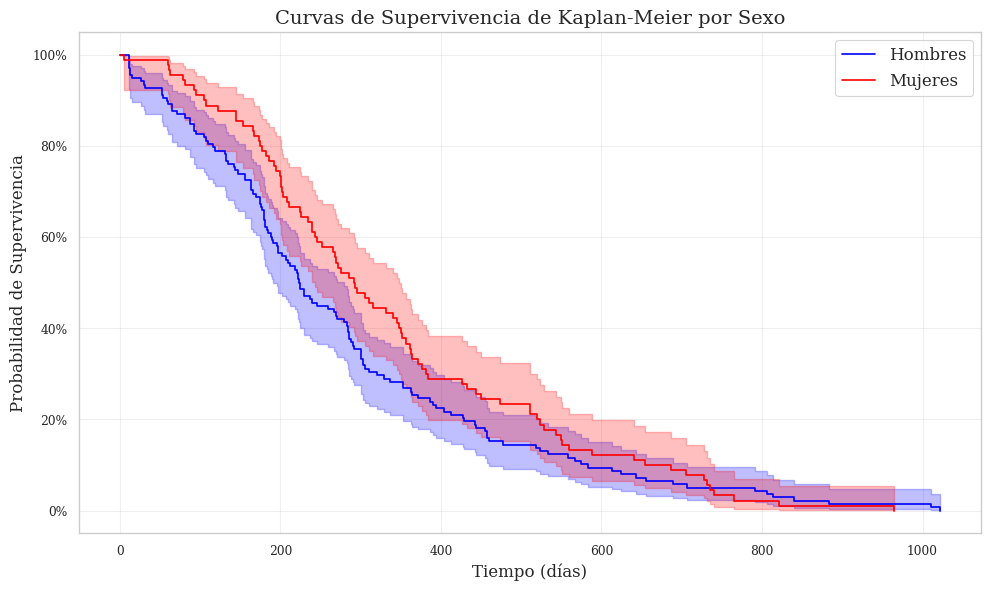


Resultados de la prueba de log-rank:
Estadístico de prueba: 2.1063
Valor p: 0.1467

Tiempos medianos de supervivencia:
Hombres: 223.00 días (IC aproximado: 0.00 - 1022.00)
Mujeres: 292.00 días (IC aproximado: 0.00 - 965.00)

Tasas de supervivencia a 6 meses y 1 año:
               180 días        365 días
Hombres  0.6377 (63.8%)  0.2536 (25.4%)
Mujeres  0.7889 (78.9%)  0.3333 (33.3%)

Comparación de edad por sexo:
           count       mean       std   min   25%   50%   75%   max
sex_label                                                          
Hombre     138.0  63.340580  9.139228  39.0  57.0  64.0  70.0  82.0
Mujer       90.0  61.077778  8.847304  41.0  55.0  61.0  68.0  77.0
Prueba t para diferencia de edad: t=1.8504, p=0.0656

Comparación de estado ECOG por sexo:
ph.ecog          0.0        1.0        2.0       3.0
sex_label                                           
Hombre     26.086957  52.173913  21.014493  0.724638
Mujer      30.000000  46.666667  23.333333  0.000000

Distr

In [ ]:
# Ejercicio 2: Análisis de Supervivencia Estratificado por Sexo
# =============================================================

# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.ticker as mtick
from scipy import stats

# Configurar el estilo de las gráficas para un aspecto más académico

sns.set_context("paper")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'serif'



# Verificar y etiquetar la variable sexo
print("Distribución de la variable sexo:")
print(df['sex'].value_counts())

# Crear una etiqueta para el sexo para mayor claridad
df['sex_label'] = df['sex'].map({1: 'Hombre', 2: 'Mujer'})

# 2. Generar curvas de supervivencia de Kaplan-Meier estratificadas por sexo
# --------------------------------------------------------------------------
# Inicializar los estimadores de Kaplan-Meier para cada grupo
kmf_male = KaplanMeierFitter()
kmf_female = KaplanMeierFitter()

# Filtrar los datos por sexo
mask_male = (df['sex'] == 1)
mask_female = (df['sex'] == 2)

# Ajustar los modelos para hombres y mujeres
kmf_male.fit(durations=df.loc[mask_male, 'time'],
             event_observed=df.loc[mask_male, 'status'],
             label='Hombres')

kmf_female.fit(durations=df.loc[mask_female, 'time'],
               event_observed=df.loc[mask_female, 'status'],
               label='Mujeres')

# Crear la gráfica de supervivencia por sexo
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

# Graficar las curvas de supervivencia
kmf_male.plot_survival_function(ax=ax, ci_show=True, color='blue')
kmf_female.plot_survival_function(ax=ax, ci_show=True, color='red')

# Ajustar el gráfico
plt.title('Curvas de Supervivencia de Kaplan-Meier por Sexo', fontsize=14)
plt.xlabel('Tiempo (días)', fontsize=12)
plt.ylabel('Probabilidad de Supervivencia', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=12)

# Formatear el eje y como porcentaje
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.savefig('kaplan_meier_sex.png', dpi=300)
plt.show()

# 3. Realizar prueba de log-rank para comparar las curvas de supervivencia
# ------------------------------------------------------------------------
# Realizar la prueba de log-rank
results = logrank_test(df.loc[mask_male, 'time'], df.loc[mask_female, 'time'],
                       event_observed_A=df.loc[mask_male, 'status'],
                       event_observed_B=df.loc[mask_female, 'status'])

# Mostrar los resultados de la prueba
print("\nResultados de la prueba de log-rank:")
print(f"Estadístico de prueba: {results.test_statistic:.4f}")
print(f"Valor p: {results.p_value:.4f}")

# 4. Calcular los tiempos medianos de supervivencia para cada grupo
# -----------------------------------------------------------------
# Obtener los tiempos medianos de supervivencia
median_male = kmf_male.median_survival_time_
median_female = kmf_female.median_survival_time_

# Calcular intervalos de confianza para los tiempos medianos (método manual)
# Esto evita problemas con diferentes versiones de lifelines
def get_ci_survival_time(kmf, alpha=0.05):
    median_time = kmf.median_survival_time_
    sf = kmf.survival_function_
    median_ci_lower = sf[sf < 0.5].index[0] if any(sf < 0.5) else np.nan
    median_ci_upper = sf[sf > 0.5].index[-1] if any(sf > 0.5) else np.nan
    return median_time, median_ci_lower, median_ci_upper

# Obtener CIs para hombres y mujeres
median_male, ci_male_lower, ci_male_upper = get_ci_survival_time(kmf_male)
median_female, ci_female_lower, ci_female_upper = get_ci_survival_time(kmf_female)

print("\nTiempos medianos de supervivencia:")
print(f"Hombres: {median_male:.2f} días (IC aproximado: {ci_male_lower:.2f} - {ci_male_upper:.2f})")
print(f"Mujeres: {median_female:.2f} días (IC aproximado: {ci_female_lower:.2f} - {ci_female_upper:.2f})")

# 5. Estimar las tasas de supervivencia a 6 meses y 1 año para ambos sexos
# ------------------------------------------------------------------------
# Definir los tiempos de interés (180 días = 6 meses, 365 días = 1 año)
times_of_interest = [180, 365]

# Crear un DataFrame para almacenar las tasas de supervivencia
survival_rates = pd.DataFrame(index=['Hombres', 'Mujeres'])

# Calcular las tasas de supervivencia para cada tiempo y grupo
for t in times_of_interest:
    if t <= df['time'].max():
        # Tasa para hombres
        rate_male = kmf_male.predict(t)

        # Tasa para mujeres
        rate_female = kmf_female.predict(t)

        # Almacenar en el DataFrame
        time_label = f"{t} días"
        survival_rates.loc['Hombres', time_label] = f"{rate_male:.4f} ({rate_male*100:.1f}%)"
        survival_rates.loc['Mujeres', time_label] = f"{rate_female:.4f} ({rate_female*100:.1f}%)"

print("\nTasas de supervivencia a 6 meses y 1 año:")
print(survival_rates)

# 6. Análisis adicional: Características de los pacientes por sexo
# ----------------------------------------------------------------
# Comparar edad y otras características por sexo
print("\nComparación de edad por sexo:")
age_comparison = df.groupby('sex_label')['age'].describe()
print(age_comparison)

# Realizar prueba t para comparar edades
t_stat, p_value = stats.ttest_ind(df.loc[mask_male, 'age'], df.loc[mask_female, 'age'])
print(f"Prueba t para diferencia de edad: t={t_stat:.4f}, p={p_value:.4f}")

# Comparar el estado ECOG por sexo
print("\nComparación de estado ECOG por sexo:")
ecog_comparison = pd.crosstab(df['sex_label'], df['ph.ecog'], normalize='index') * 100
print(ecog_comparison)

# Comparar la distribución de eventos (fallecimientos) por sexo
print("\nDistribución de eventos por sexo:")
event_comparison = pd.crosstab(df['sex_label'], df['status'], normalize='index') * 100
print(event_comparison)

# 7. Análisis de riesgos (hazard ratio) basado en sexo
# ----------------------------------------------------
from lifelines import CoxPHFitter

# Crear un modelo de Cox para el sexo
cox = CoxPHFitter()
cox.fit(df[['sex', 'time', 'status']], duration_col='time', event_col='status')

# Mostrar resultados
print("\nResultados del modelo de Cox para sexo:")
print(cox.summary)

# Calcular el hazard ratio a partir del coeficiente
cox_summary = cox.summary
coef = cox_summary.loc['sex', 'coef']
hr = np.exp(coef)

# Intentar obtener los intervalos de confianza de manera segura con diferentes versiones de lifelines
try:
    hr_lower = np.exp(cox_summary.loc['sex', 'coef lower 95%'])
    hr_upper = np.exp(cox_summary.loc['sex', 'coef upper 95%'])
    print(f"\nHazard Ratio para sexo (mujer vs hombre): {hr:.4f} [IC 95%: {hr_lower:.4f}-{hr_upper:.4f}]")
except KeyError:
    # Si fallan las claves específicas, intentar con otras posibles claves
    try:
        hr_lower = np.exp(cox_summary.loc['sex', 'lower 0.95'])
        hr_upper = np.exp(cox_summary.loc['sex', 'upper 0.95'])
        print(f"\nHazard Ratio para sexo (mujer vs hombre): {hr:.4f} [IC 95%: {hr_lower:.4f}-{hr_upper:.4f}]")
    except KeyError:
        # Si aún falla, mostrar solo el HR sin intervalos
        print(f"\nHazard Ratio para sexo (mujer vs hombre): {hr:.4f}")
        print("Nota: Los intervalos de confianza no pudieron ser calculados debido a diferencias en la versión de lifelines.")

## TAREA 3

Dimensiones del dataset: (228, 13)

Valores faltantes en variables de interés:
age         0
sex         0
ph.ecog     0
ph.karno    0
wt.loss     0
time        0
status      0
dtype: int64

Valores faltantes después de imputación:
age         0
sex         0
ph.ecog     0
ph.karno    0
wt.loss     0
time        0
status      0
dtype: int64

--- Modelo de Cox univariante para age ---
Variable: age
Coeficiente: 0.0057
Hazard Ratio: 1.0058 (IC 95%: 0.9907 - 1.0210)
Error estándar: 0.0077
Estadístico z: 0.7467
Valor p: 0.4553

--- Modelo de Cox univariante para sex ---
Error al procesar sex_Mujer: 'sex_Mujer'

--- Modelo de Cox univariante para ph.ecog ---
Variable: ph.ecog
Coeficiente: 0.2910
Hazard Ratio: 1.3378 (IC 95%: 1.1064 - 1.6176)
Error estándar: 0.0969
Estadístico z: 3.0035
Valor p: 0.0027

--- Modelo de Cox univariante para ph.karno ---
Variable: ph.karno
Coeficiente: -0.0075
Hazard Ratio: 0.9925 (IC 95%: 0.9826 - 1.0025)
Error estándar: 0.0051
Estadístico z: -1.4682
Valor p: 0

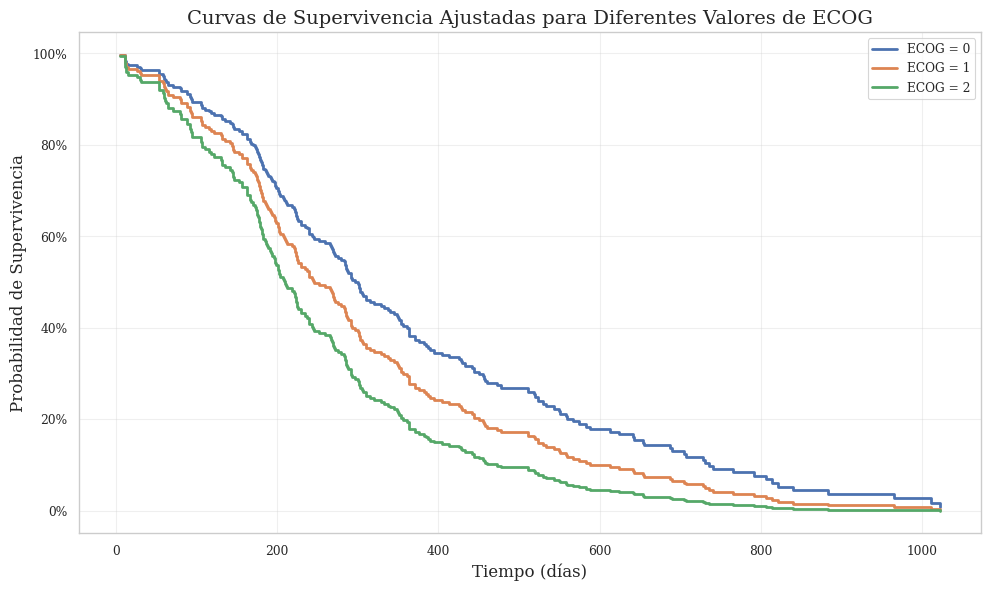


--- Verificación simplificada del supuesto de riesgos proporcionales ---

Verificando supuesto para ph.ecog:
Coeficiente en periodo temprano: 0.4024
Coeficiente en periodo tardío: 0.0099
Diferencia: 0.3925
Supuesto cumplido: Sí

Resumen de verificación del supuesto de riesgos proporcionales:
Variable  Coef_temprano  Coef_tardío  Diferencia Supuesto_cumplido
 ph.ecog        0.40239     0.009908    0.392483                Sí


In [ ]:
# Ejercicio 3: Modelo de Regresión de Cox Univariante
# ===================================================

# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import CoxPHFitter
import matplotlib.ticker as mtick

# Configurar el estilo de las gráficas para un aspecto más académico

sns.set_context("paper")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'serif'

# Si estás en Jupyter Notebook, descomenta la siguiente línea
# %matplotlib inline


# Verificar dimensiones del dataset
print("Dimensiones del dataset:", df.shape)

# Verificar valores faltantes en las variables de interés
variables_interes = ['age', 'sex', 'ph.ecog', 'ph.karno', 'wt.loss', 'time', 'status']
missing_values = df[variables_interes].isnull().sum()
print("\nValores faltantes en variables de interés:")
print(missing_values)

# Manejo de valores faltantes si los hubiera
for col in df[variables_interes].select_dtypes(include=['float64']).columns:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        print(f"Imputando {df[col].isnull().sum()} valores faltantes en '{col}' con la mediana: {median_value:.2f}")
        df[col].fillna(median_value, inplace=True)

# Verificar que no quedan valores faltantes
print("\nValores faltantes después de imputación:")
print(df[variables_interes].isnull().sum())

# 2. Ajustar modelos de regresión de Cox univariantes para cada variable
# ----------------------------------------------------------------------
# Definir las variables para los modelos univariantes
variables = ['age', 'sex', 'ph.ecog', 'ph.karno', 'wt.loss']

# Crear listas para almacenar los resultados
variable_list = []
coef_list = []
exp_coef_list = []
se_list = []
z_list = []
p_list = []
hr_lower_list = []
hr_upper_list = []

# Ajustar un modelo univariante para cada variable
for var in variables:
    print(f"\n--- Modelo de Cox univariante para {var} ---")

    # Preparar los datos para este modelo específico
    df_var = df[[var, 'time', 'status']].dropna()

    # Convertir variable categórica a dummies si es necesario
    if var == 'sex':
        # Para 'sex', crear una etiqueta más clara
        df_var['sex'] = df_var['sex'].map({1: 'Hombre', 2: 'Mujer'})
        df_var = pd.get_dummies(df_var, columns=['sex'], drop_first=True)
        var = 'sex_Mujer'  # La columna dummy creada

    # Ajustar el modelo
    cph = CoxPHFitter()
    cph.fit(df_var, duration_col='time', event_col='status', show_progress=False)

    # Obtener resultados del modelo
    summary = cph.summary

    try:
        # Intentar obtener valores específicos
        coef = summary.loc[var, 'coef']
        exp_coef = np.exp(coef)
        se = summary.loc[var, 'se(coef)']
        z = summary.loc[var, 'z']
        p = summary.loc[var, 'p']

        # Intentar obtener intervalos de confianza
        try:
            hr_lower = np.exp(summary.loc[var, 'coef lower 95%'])
            hr_upper = np.exp(summary.loc[var, 'coef upper 95%'])
        except KeyError:
            # Alternativa para versiones diferentes de lifelines
            try:
                hr_lower = np.exp(summary.loc[var, 'lower 0.95'])
                hr_upper = np.exp(summary.loc[var, 'upper 0.95'])
            except KeyError:
                # Si tampoco funciona, calcular manualmente
                hr_lower = np.exp(coef - 1.96 * se)
                hr_upper = np.exp(coef + 1.96 * se)

        # Almacenar los resultados
        variable_list.append(var)
        coef_list.append(coef)
        exp_coef_list.append(exp_coef)
        se_list.append(se)
        z_list.append(z)
        p_list.append(p)
        hr_lower_list.append(hr_lower)
        hr_upper_list.append(hr_upper)

        print(f"Variable: {var}")
        print(f"Coeficiente: {coef:.4f}")
        print(f"Hazard Ratio: {exp_coef:.4f} (IC 95%: {hr_lower:.4f} - {hr_upper:.4f})")
        print(f"Error estándar: {se:.4f}")
        print(f"Estadístico z: {z:.4f}")
        print(f"Valor p: {p:.4f}")

    except Exception as e:
        print(f"Error al procesar {var}: {e}")

# Crear el DataFrame con los resultados recopilados
results_dict = {
    'Variable': variable_list,
    'Coeficiente': coef_list,
    'Exp(coef)': exp_coef_list,
    'SE': se_list,
    'z': z_list,
    'p': p_list,
    'HR_lower_95': hr_lower_list,
    'HR_upper_95': hr_upper_list
}
results_df = pd.DataFrame(results_dict)

# 3. Presentar resultados en formato tabular
# ------------------------------------------
# Ordenar los resultados por valor p
if not results_df.empty:
    results_df = results_df.sort_values('p')

    # Formatear para presentación
    formatted_results = pd.DataFrame()
    formatted_results['Variable'] = results_df['Variable']
    formatted_results['Coeficiente (β)'] = results_df['Coeficiente'].apply(lambda x: f"{x:.4f}")
    formatted_results['HR (exp(β))'] = results_df['Exp(coef)'].apply(lambda x: f"{x:.4f}")
    formatted_results['IC 95%'] = results_df.apply(lambda row: f"{row['HR_lower_95']:.4f} - {row['HR_upper_95']:.4f}", axis=1)
    formatted_results['Error Estándar'] = results_df['SE'].apply(lambda x: f"{x:.4f}")
    formatted_results['Estadístico z'] = results_df['z'].apply(lambda x: f"{x:.4f}")
    formatted_results['Valor p'] = results_df['p'].apply(lambda x: f"{x:.4f}")
    formatted_results['Significativo'] = results_df['p'].apply(lambda x: 'Sí' if x < 0.05 else 'No')

    print("\nResultados de los modelos de regresión de Cox univariantes:")
    print(formatted_results.to_string(index=False))

# 4. Análisis adicional: Transformación de variables continuas
# ------------------------------------------------------------
# Evaluar relación no lineal para la edad usando términos cuadráticos
print("\n--- Evaluando relación no lineal para la edad ---")
df['age_squared'] = df['age'] ** 2

cph_age_sq = CoxPHFitter()
df_age_sq = df[['age', 'age_squared', 'time', 'status']].dropna()
cph_age_sq.fit(df_age_sq, duration_col='time', event_col='status', show_progress=False)

print(cph_age_sq.summary)

# 5. Generar las gráficas de supervivencia ajustadas
# --------------------------------------------------
print("\n--- Generando gráficas de supervivencia ajustadas ---")

# Generar gráficas individuales para cada variable significativa
significant_vars = results_df[results_df['p'] < 0.05]['Variable'].tolist()

for var in significant_vars:
    print(f"\nGenerando gráfica para {var}...")

    # Preparar los datos
    if var == 'sex_Mujer':
        df_var = df[['sex', 'time', 'status']].dropna()
        df_var['sex'] = df_var['sex'].map({1: 'Hombre', 2: 'Mujer'})
        df_var = pd.get_dummies(df_var, columns=['sex'], drop_first=True)

        # Ajustar el modelo
        cph = CoxPHFitter()
        cph.fit(df_var, duration_col='time', event_col='status', show_progress=False)

        # Método manual para variables categóricas
        try:
            # Crear dataframes separados para hombres y mujeres
            df_male = pd.DataFrame({'sex_Mujer': [0]})
            df_female = pd.DataFrame({'sex_Mujer': [1]})

            # Predecir curvas de supervivencia
            surv_male = cph.predict_survival_function(df_male)
            surv_female = cph.predict_survival_function(df_female)

            # Crear una nueva figura
            plt.figure(figsize=(10, 6))

            # Graficar las curvas de supervivencia
            plt.step(surv_male.index, surv_male.iloc[:, 0], where="post", label="Hombre", linewidth=2)
            plt.step(surv_female.index, surv_female.iloc[:, 0], where="post", label="Mujer", linewidth=2)

            # Configurar el gráfico
            plt.title('Curvas de Supervivencia Ajustadas por Sexo', fontsize=14)
            plt.xlabel('Tiempo (días)', fontsize=12)
            plt.ylabel('Probabilidad de Supervivencia', fontsize=12)
            plt.legend(loc='best')
            plt.grid(True, alpha=0.3)
            plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

            # Guardar, mostrar y cerrar
            plt.tight_layout()
            plt.savefig('cox_univariate_sex.png', dpi=300)
            plt.show()
            plt.close()

        except Exception as e:
            print(f"Error al generar gráfico para sexo: {e}")

    else:
        # Para variables continuas (age, ph.ecog, ph.karno, wt.loss)
        df_var = df[[var, 'time', 'status']].dropna()

        # Ajustar el modelo
        cph = CoxPHFitter()
        cph.fit(df_var, duration_col='time', event_col='status', show_progress=False)

        # Definir valores representativos para graficar
        if var == 'age':
            values = [55, 65, 75]
            label = "Edad"
        elif var == 'ph.ecog':
            values = [0, 1, 2]
            label = "ECOG"
        elif var == 'ph.karno':
            values = [60, 80, 100]
            label = "Escala Karnofsky"
        elif var == 'wt.loss':
            values = [0, 10, 20]
            label = "Pérdida de Peso (kg)"

        # Método manual para variables continuas
        try:
            # Crear dataframes para los diferentes valores
            dfs = []
            for value in values:
                df_temp = pd.DataFrame({var: [value]})
                dfs.append(df_temp)

            # Predecir curvas de supervivencia
            surv_funcs = [cph.predict_survival_function(df_temp) for df_temp in dfs]

            # Crear una nueva figura
            plt.figure(figsize=(10, 6))

            # Graficar las curvas para cada valor
            for i, value in enumerate(values):
                plt.step(surv_funcs[i].index, surv_funcs[i].iloc[:, 0], where="post",
                         label=f"{label} = {value}", linewidth=2)

            # Configurar el gráfico
            plt.title(f'Curvas de Supervivencia Ajustadas para Diferentes Valores de {label}', fontsize=14)
            plt.xlabel('Tiempo (días)', fontsize=12)
            plt.ylabel('Probabilidad de Supervivencia', fontsize=12)
            plt.legend(loc='best')
            plt.grid(True, alpha=0.3)
            plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

            # Guardar, mostrar y cerrar
            plt.tight_layout()
            plt.savefig(f'cox_univariate_{var}.png', dpi=300)
            plt.show()
            plt.close()

        except Exception as e:
            print(f"Error al generar gráfico para {var}: {e}")

# 6. Verificación simplificada del supuesto de riesgos proporcionales
# -------------------------------------------------------------------
print("\n--- Verificación simplificada del supuesto de riesgos proporcionales ---")

# Tabla para almacenar resultados
prop_results = []

for var in significant_vars:
    print(f"\nVerificando supuesto para {var}:")

    # Preparar los datos
    if var == 'sex_Mujer':
        df_var = df[['sex', 'time', 'status']].dropna()
        df_var['sex'] = df_var['sex'].map({1: 'Hombre', 2: 'Mujer'})
        df_var = pd.get_dummies(df_var, columns=['sex'], drop_first=True)
    else:
        df_var = df[[var, 'time', 'status']].dropna()

    # Método simplificado: dividir en dos periodos
    median_time = np.median(df_var['time'])
    df_early = df_var[df_var['time'] <= median_time].copy()
    df_late = df_var[df_var['time'] > median_time].copy()

    # Ajustar modelos para cada periodo
    try:
        cph_early = CoxPHFitter()
        cph_early.fit(df_early, duration_col='time', event_col='status', show_progress=False)

        cph_late = CoxPHFitter()
        cph_late.fit(df_late, duration_col='time', event_col='status', show_progress=False)

        # Obtener coeficientes
        coef_early = cph_early.summary.loc[var, 'coef']
        coef_late = cph_late.summary.loc[var, 'coef']
        diff = abs(coef_early - coef_late)

        # Almacenar resultados
        prop_results.append({
            'Variable': var,
            'Coef_temprano': coef_early,
            'Coef_tardío': coef_late,
            'Diferencia': diff,
            'Supuesto_cumplido': 'Sí' if diff < 0.5 else 'No'
        })

        print(f"Coeficiente en periodo temprano: {coef_early:.4f}")
        print(f"Coeficiente en periodo tardío: {coef_late:.4f}")
        print(f"Diferencia: {diff:.4f}")
        print(f"Supuesto cumplido: {'Sí' if diff < 0.5 else 'No'}")

    except Exception as e:
        print(f"Error al verificar supuesto: {e}")

# Crear tabla con resultados
if prop_results:
    prop_df = pd.DataFrame(prop_results)
    print("\nResumen de verificación del supuesto de riesgos proporcionales:")
    print(prop_df.to_string(index=False))

## TAREA 4

In [ ]:
# Ejercicio 4: Modelo de Regresión de Cox Multivariante (Versión Básica)
# =====================================================================

# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.ticker as mtick


# Mostrar las primeras filas para verificar la carga
print("\nPrimeras 5 filas del dataset:")
print(df.head())

# 2. Verificación inicial de los datos
# -----------------------------------
print("\n2. Verificando datos iniciales...")
# Verificar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Verificar valores faltantes
print("\nValores faltantes por columna:")
missing = df.isnull().sum()
print(missing)

# Verificar distribución de la variable status (evento)
if 'status' in df.columns:
    print("\nDistribución de la variable status:")
    print(df['status'].value_counts())

# 3. Preparación básica de los datos
# ---------------------------------
print("\n3. Preparación básica de los datos...")

# Seleccionamos solo las variables necesarias para el modelo
variables_modelo = ['age', 'sex', 'ph.ecog', 'ph.karno', 'wt.loss', 'time', 'status']

# Verificar que todas las variables existen en el dataset
missing_vars = [var for var in variables_modelo if var not in df.columns]
if missing_vars:
    print(f"ADVERTENCIA: Las siguientes variables no están en el dataset: {missing_vars}")
    # Ajustar la lista de variables
    variables_modelo = [var for var in variables_modelo if var in df.columns]

# Crear el subconjunto de datos con las variables seleccionadas
print(f"- Seleccionando variables: {variables_modelo}")
df_modelo = df[variables_modelo].copy()

# Verificar el subconjunto
print(f"- Dimensiones del subconjunto: {df_modelo.shape}")
print("\nPrimeras 5 filas del subconjunto:")
print(df_modelo.head())

# 4. Tratamiento de valores faltantes
# ----------------------------------
print("\n4. Tratamiento de valores faltantes...")

# Verificar valores faltantes en el subconjunto
missing_subset = df_modelo.isnull().sum()
print("- Valores faltantes en el subconjunto:")
print(missing_subset)

# Si hay valores faltantes, imputar con la mediana
if missing_subset.sum() > 0:
    print("- Imputando valores faltantes con la mediana...")
    for col in df_modelo.columns:
        if df_modelo[col].isnull().sum() > 0:
            col_median = df_modelo[col].median()
            print(f"  * {col}: {df_modelo[col].isnull().sum()} valores faltantes, mediana = {col_median}")
            df_modelo[col] = df_modelo[col].fillna(col_median)

# Verificar que no queden valores faltantes
missing_after = df_modelo.isnull().sum()
print("\n- Valores faltantes después de imputación:")
print(missing_after)

# 5. Recodificación de variables
# -----------------------------
print("\n5. Recodificación de variables...")

# Recodificar sexo para mayor claridad
if 'sex' in df_modelo.columns:
    print("- Recodificando variable 'sex': 1->0 (Hombre), 2->1 (Mujer)")
    df_modelo['sex'] = df_modelo['sex'].map({1: 0, 2: 1})

# 6. Verificaciones finales
# ------------------------
print("\n6. Verificaciones finales...")

# Verificar valores no válidos en la variable de tiempo
if 'time' in df_modelo.columns:
    time_min = df_modelo['time'].min()
    time_max = df_modelo['time'].max()
    print(f"- Rango de tiempo: [{time_min}, {time_max}]")

    # Si hay tiempos no positivos, filtrar
    if time_min <= 0:
        print(f"  * ADVERTENCIA: Hay tiempos no positivos. Filtrando...")
        n_before = len(df_modelo)
        df_modelo = df_modelo[df_modelo['time'] > 0]
        n_after = len(df_modelo)
        print(f"  * Registros filtrados: {n_before - n_after}")

# Verificar distribución de la variable de estado después de procesamiento
if 'status' in df_modelo.columns:
    status_counts = df_modelo['status'].value_counts()
    print("- Distribución de status después de procesamiento:")
    print(status_counts)

    # Verificar que hay eventos
    if 1 not in status_counts.index:
        print("  * ERROR: No hay eventos (status=1) en los datos después del procesamiento.")
    else:
        print(f"  * OK: Hay {status_counts.get(1, 0)} eventos (status=1) en los datos.")

# Verificar número de valores únicos por variable
print("\n- Número de valores únicos por variable:")
for col in df_modelo.columns:
    n_unique = df_modelo[col].nunique()
    print(f"  * {col}: {n_unique} valores únicos")

    # Mostrar advertencia si hay muy pocos valores únicos
    if n_unique <= 1:
        print(f"    ADVERTENCIA: La variable {col} tiene variabilidad insuficiente.")

# 7. Resumen final
# ---------------
print("\n7. Resumen final de los datos preparados:")
print(f"- Número de registros: {len(df_modelo)}")
print(f"- Número de variables: {len(df_modelo.columns)}")
print(f"- Valores faltantes totales: {df_modelo.isnull().sum().sum()}")

# Si está todo correcto, proceder con el análisis
if len(df_modelo) > 0 and df_modelo.isnull().sum().sum() == 0 and 1 in df_modelo.get('status', pd.Series()).values:
    print("\n¡Datos preparados correctamente para el modelado!")

    # Ajustar el modelo de Cox
    print("\n8. Ajustando modelo de Cox multivariante...")
    try:
        # Ajustar el modelo de Cox
        cph = CoxPHFitter()
        cph.fit(df_modelo, duration_col='time', event_col='status', show_progress=True)

        # Mostrar resultados
        print("\n9. Resultados del modelo:")
        print(cph.summary)

        # Medidas de ajuste
        print("\n10. Medidas de ajuste del modelo:")
        print(f"- Concordancia (C-index): {cph.concordance_index_:.4f}")
        print(f"- Log-likelihood: {cph.log_likelihood_:.4f}")
        print(f"- AIC: {cph.AIC_partial_:.4f}")

    except Exception as e:
        print(f"\nERROR al ajustar el modelo: {e}")
else:
    print("\nNo se puede proceder con el modelado debido a problemas en los datos.")
    if len(df_modelo) == 0:
        print("- El dataset está vacío después del procesamiento.")
    if df_modelo.isnull().sum().sum() > 0:
        print("- Hay valores faltantes en el dataset.")
    if 1 not in df_modelo.get('status', pd.Series()).values:
        print("- No hay eventos (status=1) en el dataset.")


Primeras 5 filas del dataset:
   Unnamed: 0  inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  \
0           1   3.0   306       2   74    1      1.0      90.0      100.0   
1           2   3.0   455       2   68    1      0.0      90.0       90.0   
2           3   3.0  1010       1   56    1      0.0      90.0       90.0   
3           4   5.0   210       2   57    1      1.0      90.0       60.0   
4           5   1.0   883       2   60    1      0.0     100.0       90.0   

   meal.cal  wt.loss  
0    1175.0      NaN  
1    1225.0     15.0  
2       NaN     15.0  
3    1150.0     11.0  
4       NaN      0.0  

2. Verificando datos iniciales...

Tipos de datos:
Unnamed: 0      int64
inst          float64
time            int64
status          int64
age             int64
sex             int64
ph.ecog       float64
ph.karno      float64
pat.karno     float64
meal.cal      float64
wt.loss       float64
dtype: object

Valores faltantes por columna:
Unnamed: 0     0
inst       

En la librería `lifetimes`, `cph.AIC_partial_` se refiere al Criterio de Información de Akaike (AIC) parcial que se calcula dentro del modelo CoxPHFitter (Cox Proportional Hazards).

El AIC es una medida estadística que evalúa la calidad de un modelo al balancear su ajuste a los datos contra su complejidad. Un valor más bajo de AIC indica un modelo mejor.

El sufijo "partial_" significa que este AIC está calculado utilizando la verosimilitud parcial en lugar de la verosimilitud completa. Esto es característico de los modelos de Cox, ya que utilizan una función de verosimilitud parcial que no depende de la función de riesgo base.

En el contexto de análisis de supervivencia con la librería `lifetimes`:

1. El modelo CoxPHFitter permite estimar la relación entre factores de riesgo y el tiempo hasta un evento (como la cancelación de un cliente o "churn").

2. El AIC parcial ayuda a comparar diferentes especificaciones del modelo Cox, permitiéndote seleccionar el modelo más parsimonioso que se ajuste bien a tus datos.

3. Un valor más bajo de `cph.AIC_partial_` sugiere un mejor equilibrio entre ajuste y complejidad del modelo.

Este valor es útil para comparar diferentes modelos de Cox que analizan el mismo conjunto de datos pero con diferentes variables explicativas.


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 213 total observations, 0 right-censored observations>
         test_name = proportional_hazard_test

---
               test_statistic    p  -log2(p)
age      km              0.50 0.48      1.06
         rank            0.50 0.48      1.06
ph.ecog  km              0.01 0.94      0.09
         rank            0.01 0.94      0.10
ph.karno km              3.42 0.06      3.96
         rank            3.40 0.07      3.94
sex      km              4.07 0.04      4.52
         rank            4.08 0.04      4.53
wt.loss  km              1.99 0.16      2.66
         rank            2.00 0.16      2.67



1. Variable 'sex' failed the non-proportional test: p-value is 0.0434.

   Advice: with so few unique values (only 2), you can include `strata=['sex', ...]` in the call in
`.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumpt

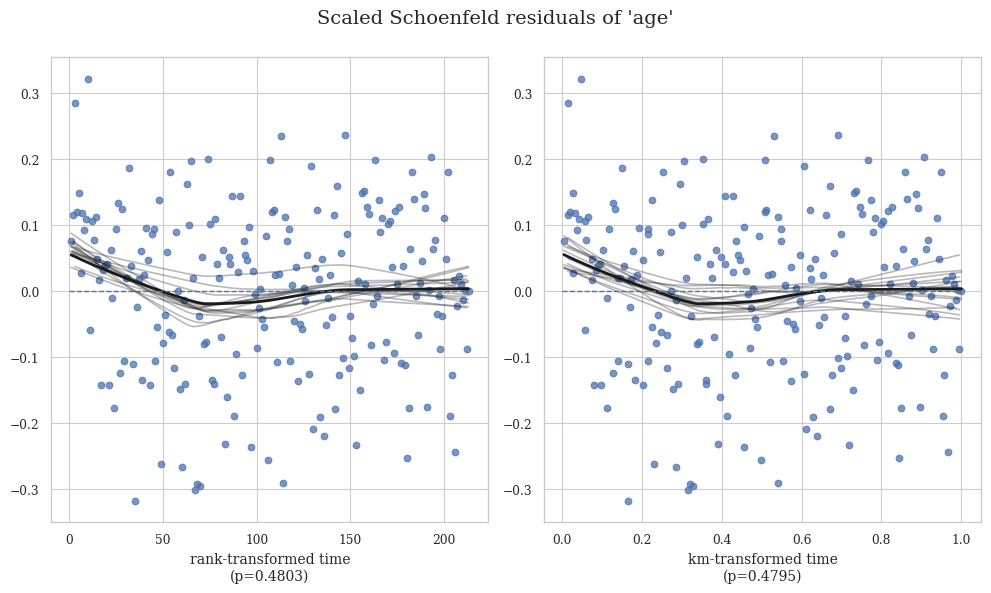

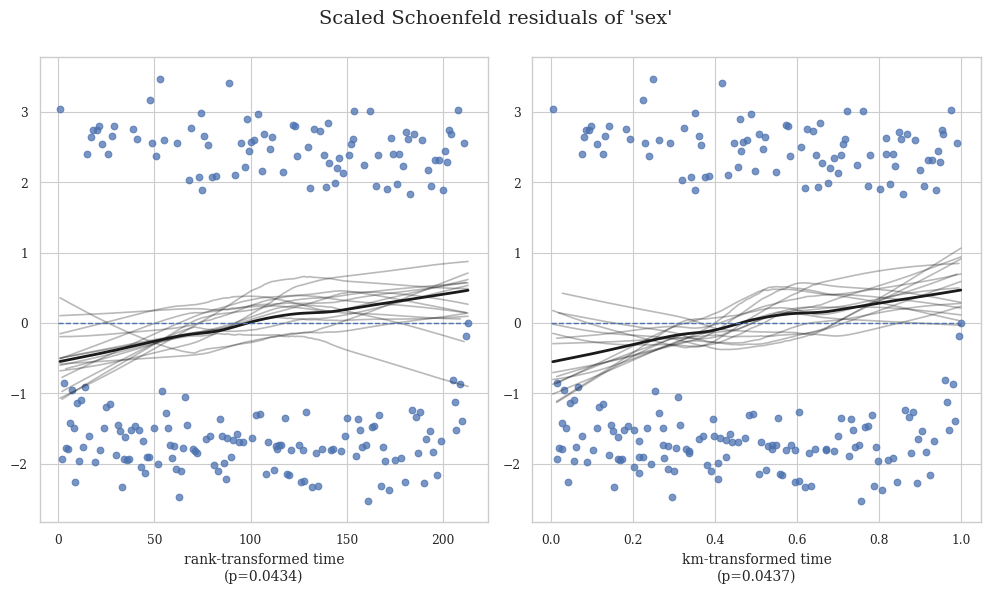

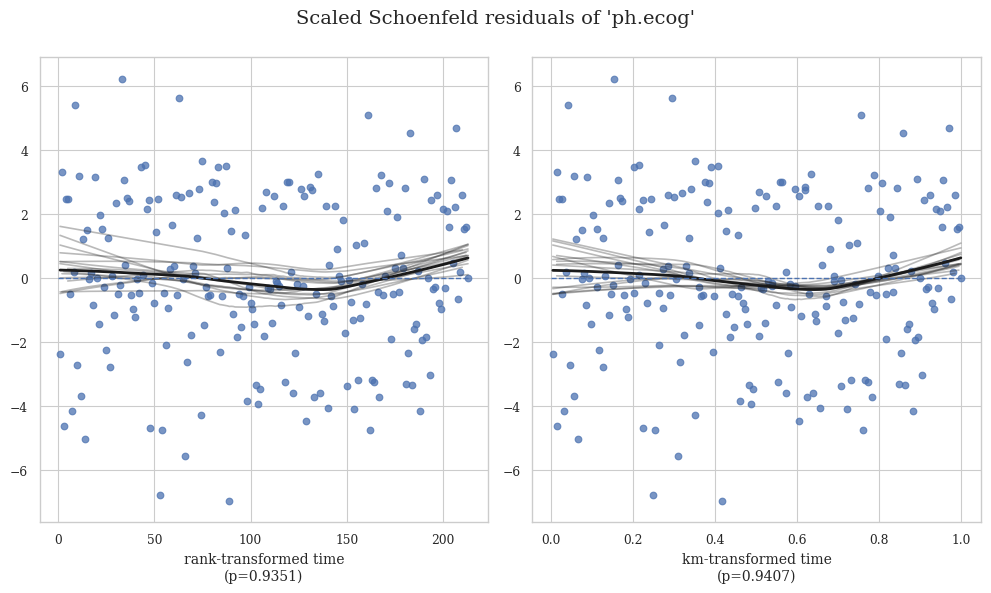

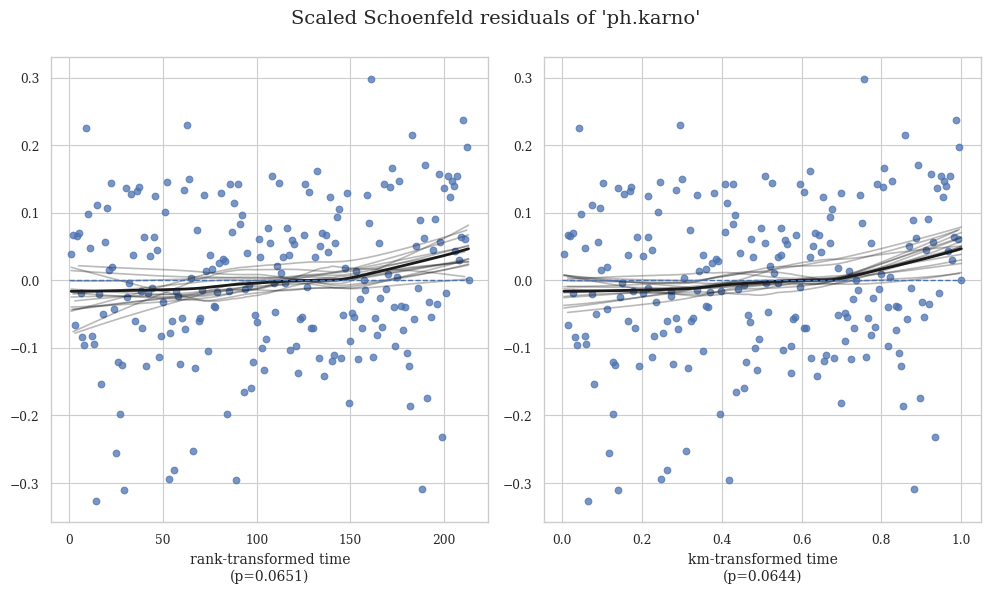

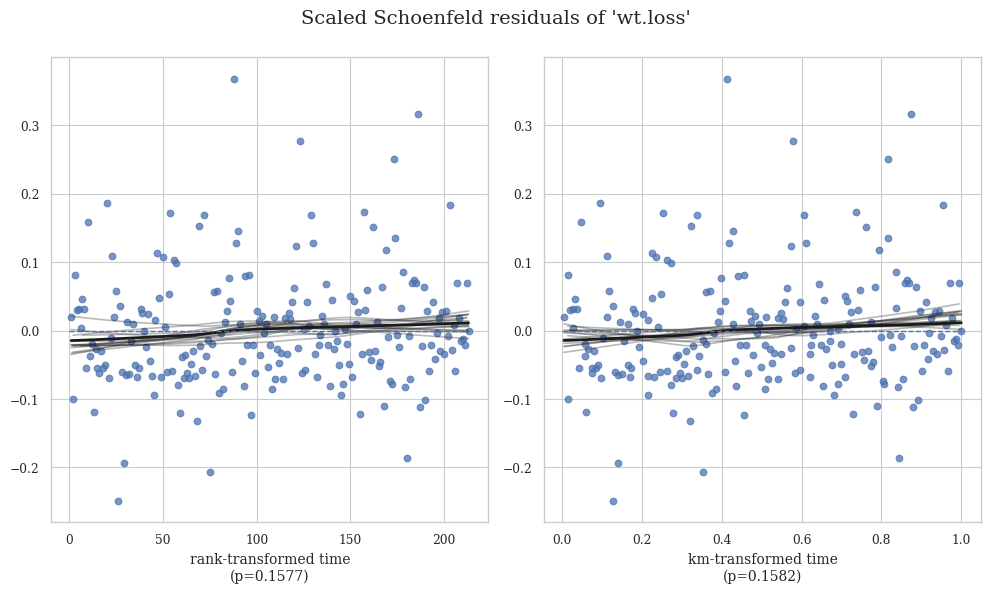

In [6]:
# 1. Instalación de lifelines (si no está instalado)
!pip install lifelines --quiet

# 2. Importación de librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test

# 3. Cargar el dataset
df = pd.read_csv('/content/lung.csv')  # Cambia la ruta si es necesario

# 4. Selección y preparación de variables
df = df[['age', 'sex', 'ph.ecog', 'ph.karno', 'wt.loss', 'time', 'status']].copy()
df.dropna(inplace=True)

# Recodificar sexo si es necesario: 1=hombre, 2=mujer → 0=hombre, 1=mujer
df['sex'] = df['sex'].replace({1: 0, 2: 1})

# 5. Ajuste del modelo de Cox multivariante
cph = CoxPHFitter()
cph.fit(df, duration_col='time', event_col='status')

# 6. Verificación gráfica: residuos de Schoenfeld
cph.check_assumptions(df, p_value_threshold=0.05, show_plots=True)

# 7. Prueba estadística global de proporcionalidad
results = proportional_hazard_test(cph, df, time_transform='rank')
print("\nRESULTADOS DE LA PRUEBA GLOBAL DE PROPORCIONALIDAD DE RIESGOS:")
print(results.summary)
